# Project 2 - Healthcare PGP

<h5>DESCRIPTION</h5>

<h4>Problem Statement</h4>
<li>NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.</li>
<li>The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.</li>
<li>Build a model to accurately predict whether the patients in the dataset have diabetes or not.</li>

<h4>Dataset Description</h4>

The datasets consists of several medical predictor variables and one target variable (Outcome). 
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 
<table>
<tr>
    <th>Variables</th>
    <th>Description</th>
</tr>
<tr>
    <td>Pregnancies</td>
    <td>Number of times pregnant</td>
</tr><tr>
    <td>Glucose</td>
    <td>Plasma glucose concentration in an oral glucose tolerance test</td>
</tr>
    <tr>
    <td>BloodPressure</td>
    <td>Diastolic blood pressure (mm Hg)</td>
</tr>
    <tr>
    <td>SkinThickness</td>
    <td>Triceps skinfold thickness (mm)</td>
</tr>
    <tr>
    <td>BMI</td>
    <td>Body Mass Index</td>
</tr>
<tr>
   <td>BMI</td>
    <td>Body Mass Index</td> 
</tr>
<tr>
    <td>DiabetesPedigreeFunctin</td>
    <td>Diabetes pedigree function</td>
</tr>
<tr>
    <td>Age</td>
    <td>Age in years</td>
</tr>
<tr>
    <td>Outcome</td>
    <td>Class variable (either 0 or 1)</td>
</tr>
</table>

Download the **datasets** from _**[here](https://github.com/Simplilearn-Edu/Data-Science-Capstone-Projects "GitHub Repository")**_.

---

## Project Task: Week 1

**Data Exploration:**

1.  Perform descriptive analysis. Understand the variables and their corresponding values. 
    On the columns below, a value of zero does not make sense and thus indicates missing value:

    * Glucose

    * BloodPressure

    * SkinThickness

    * Insulin

    * BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. 
   Create a count (frequency) plot describing the data types and the count of variables. 

### Code :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
input_ds = pd.read_csv('health care diabetes.csv')

In [18]:
input_ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
input_ds.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<p>We saw on data.head() that some features contain 0, it doesn't make sense here and this indicates missing value</p>

In [21]:
input_ds.isin(['0']).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [22]:
input_ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
input_ds['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<p>The above graph shows that the data is unbalanced. The number of non-diabetic is 268 the number of diabetic patients is 500</p>

In [26]:
input_ds.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

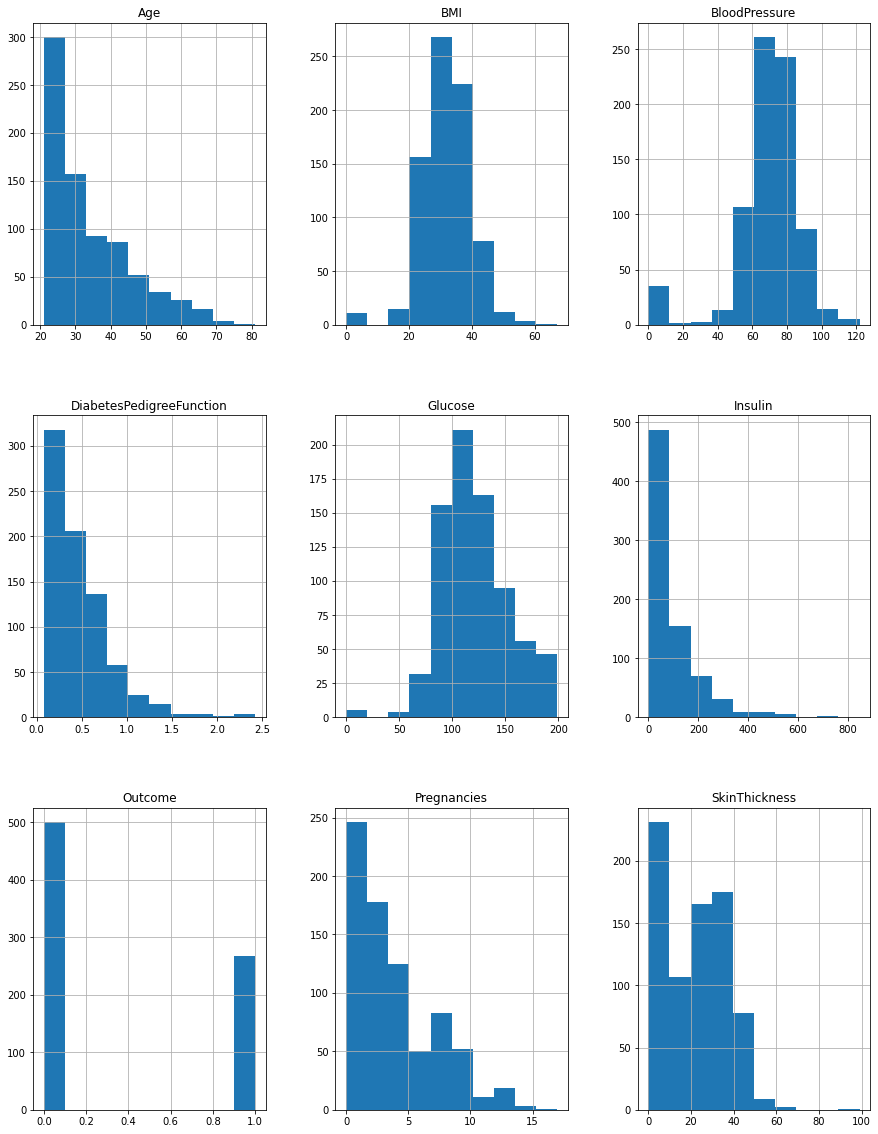

In [27]:
# Plotting histogram of dataframe
p = input_ds.hist(figsize = (15,20))

In [24]:
input_ds.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<p>Replacing the 0s with NAN to treat them accordingly</p>

In [3]:
input_ds[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = input_ds[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [37]:
input_ds.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<p>Imputing nan values for the columns in accordance with their distribution</p>

In [4]:
input_ds['Glucose'].fillna(input_ds['Glucose'].mean(), inplace = True)
input_ds['BloodPressure'].fillna(input_ds['BloodPressure'].mean(), inplace = True)
input_ds['SkinThickness'].fillna(input_ds['SkinThickness'].median(), inplace = True)
input_ds['Insulin'].fillna(input_ds['Insulin'].median(), inplace = True)
input_ds['BMI'].fillna(input_ds['BMI'].mean(), inplace = True)

<p>Plotting after Nan removal</p>

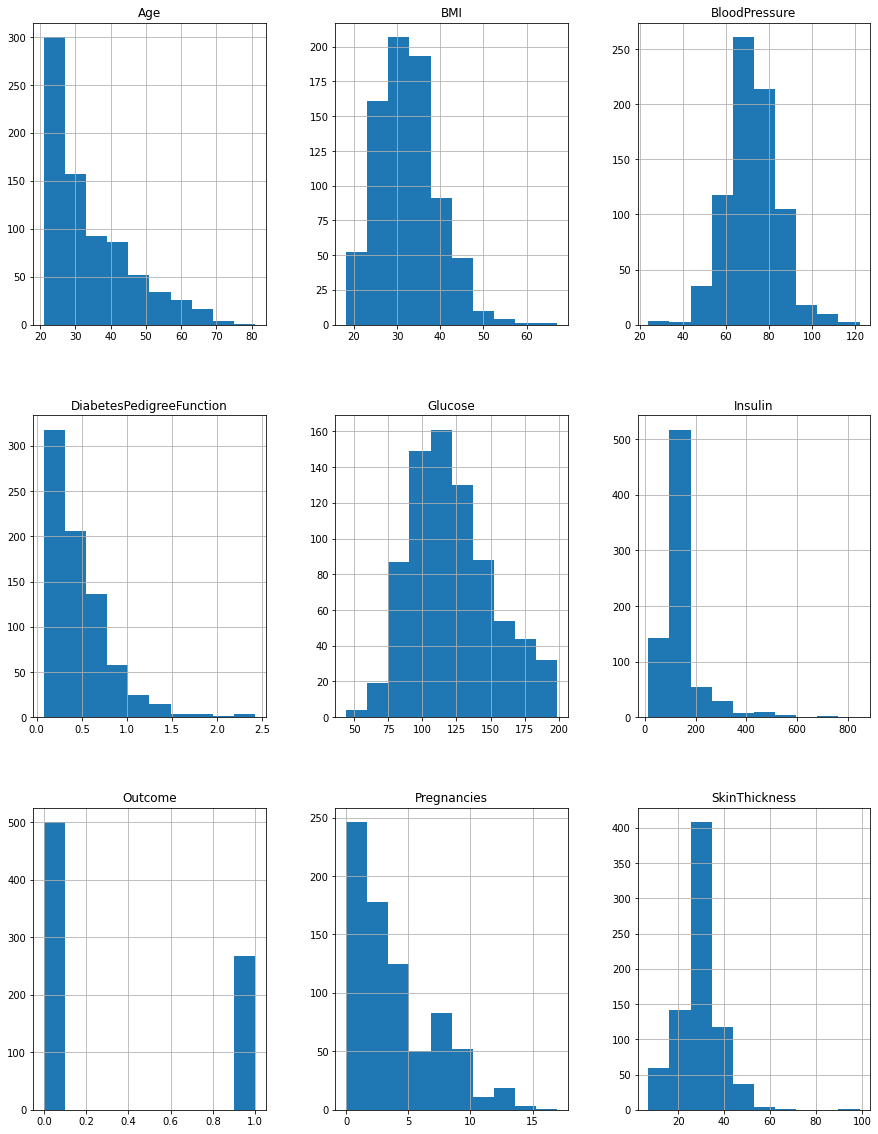

In [39]:
# Plotting histogram of dataframe
p = input_ds.hist(figsize = (15,20))

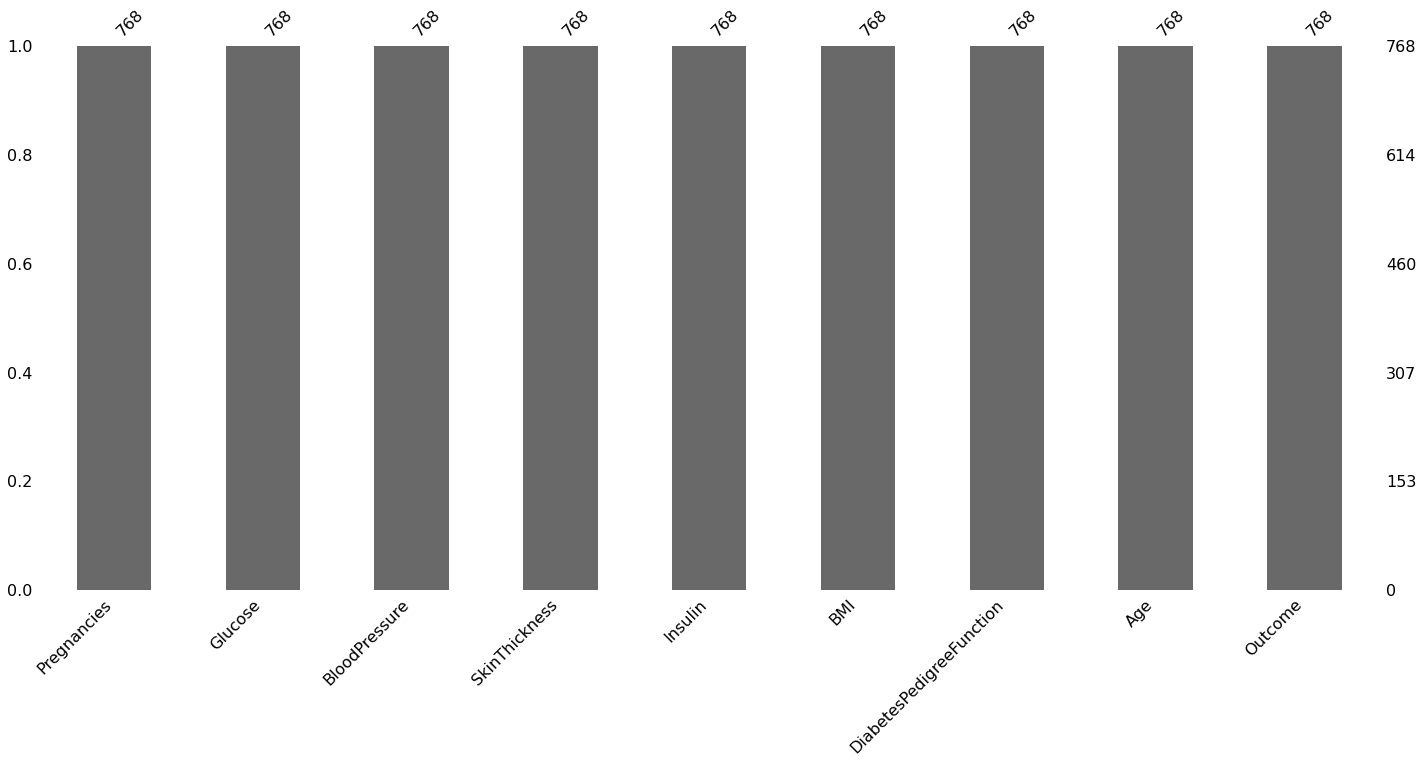

In [40]:
## count of variables after imputation
import missingno as msno
p=msno.bar(input_ds)

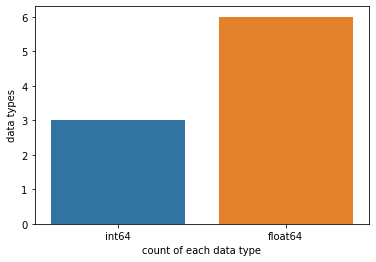

In [15]:
# data type analysis
sns.countplot(x=input_ds.dtypes.map(str) ,data=input_ds)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

In [13]:
input_ds.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Project Task: Week 2

**Data Exploration:**

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

### Code :

In [31]:
labels = ['Diabetic', 'Healthy']

<AxesSubplot:ylabel='Outcome'>

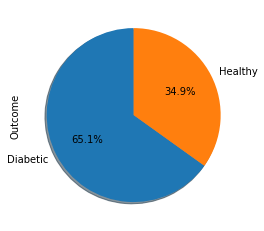

In [32]:
input_ds['Outcome'].value_counts().head(10).plot.pie(labels = labels, autopct = '%1.1f%%', shadow=True, startangle=90)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

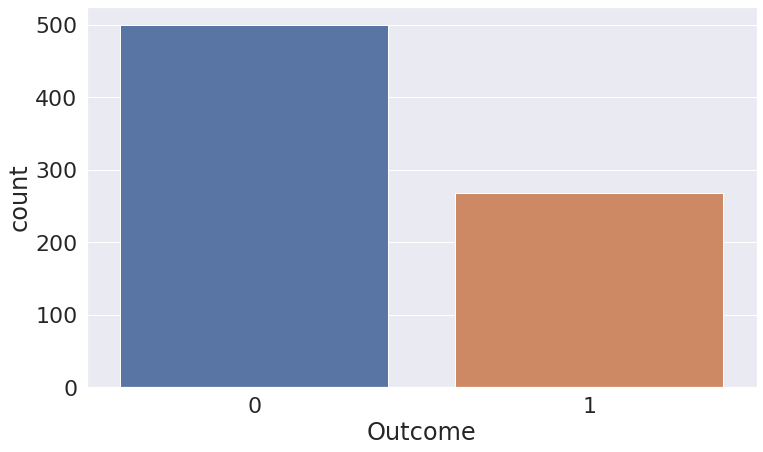

In [53]:
#Plotting the Purpose count
plt.figure(figsize=(12,7))
sns.countplot(input_ds['Outcome'])

<p>The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients<p>

<h6>Scatter Plot for relationship between all variables based on outcome</h6>

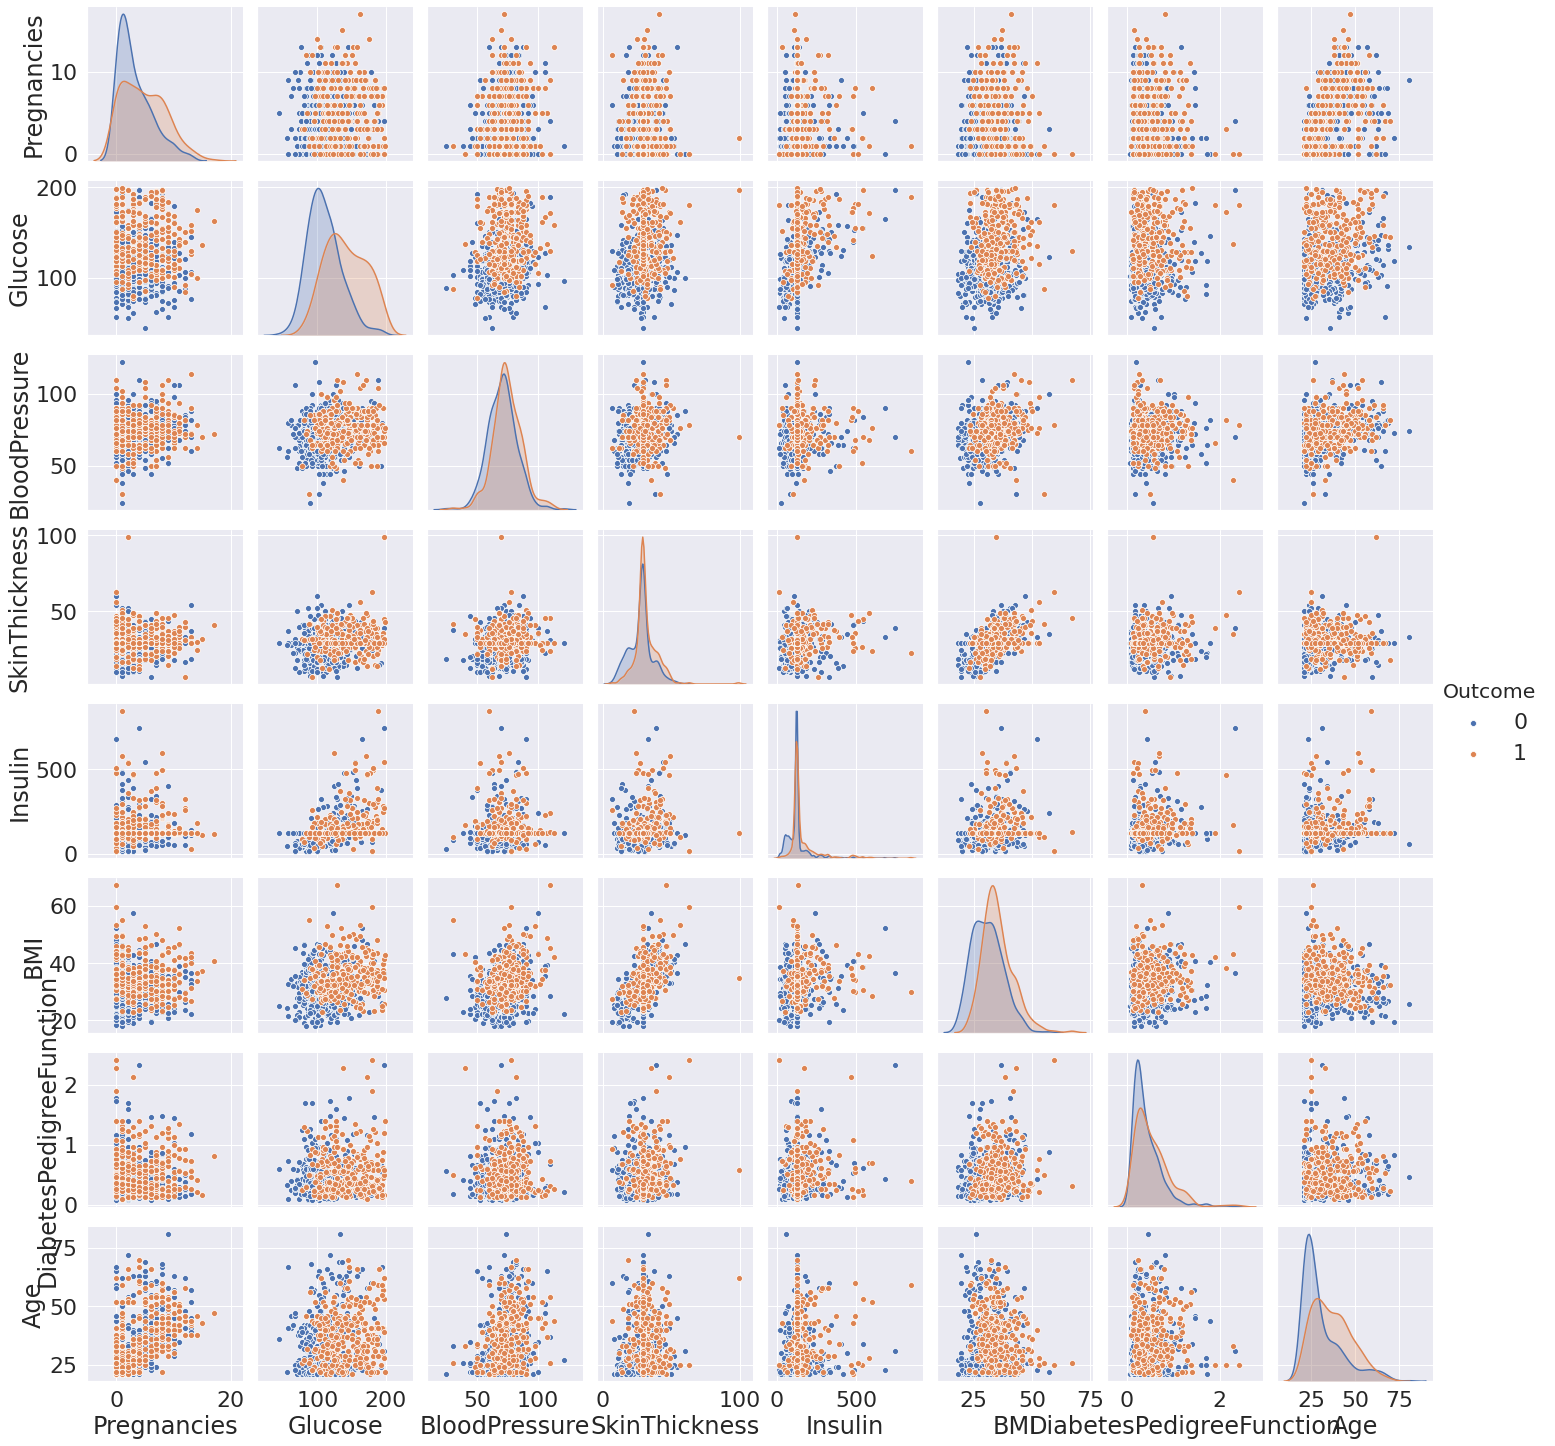

In [54]:
sns.pairplot(input_ds, hue='Outcome')

After analysing the scatter plots, we will look into some plots individually and describe the analysis

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

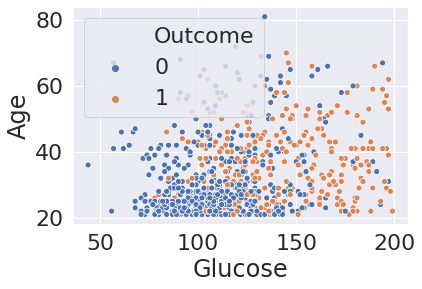

In [60]:
sns.scatterplot(x='Glucose',y='Age', data = input_ds, hue='Outcome')

<h4>Observation</h4>
<p>Healthy individuals have a Glucose concentration around 100<p>

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

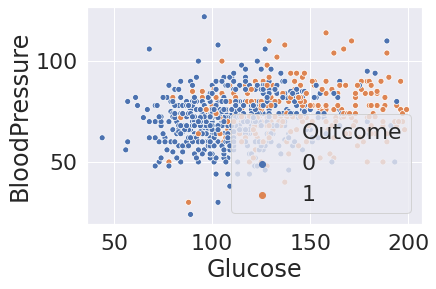

In [61]:
sns.scatterplot(x='Glucose',y='BloodPressure', data = input_ds, hue='Outcome')

<h4>Observation</h4>

Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

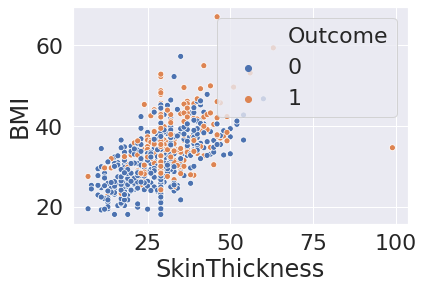

In [62]:
sns.scatterplot(x='SkinThickness',y='BMI', data = input_ds, hue='Outcome')

<h4>Observation</h4>

Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

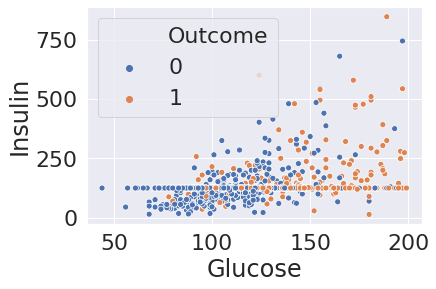

In [63]:
sns.scatterplot(x='Glucose',y='Insulin', data = input_ds, hue='Outcome')

<h4>Observation</h4>

Healthy individuals have Insulin < 250 and Glucose < 130

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

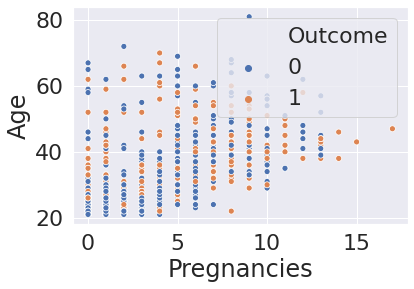

In [64]:
sns.scatterplot(x='Pregnancies',y='Age', data = input_ds, hue='Outcome')

<h4>Observation</h4>

Healthy individauls concentration is around Pregnancies <= 6 where age is <=40

<h4> Definition from the books for better understanding</h4>
<strong>Pearson's Correlation Coefficient</strong> helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A <strong>heat map</strong> is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

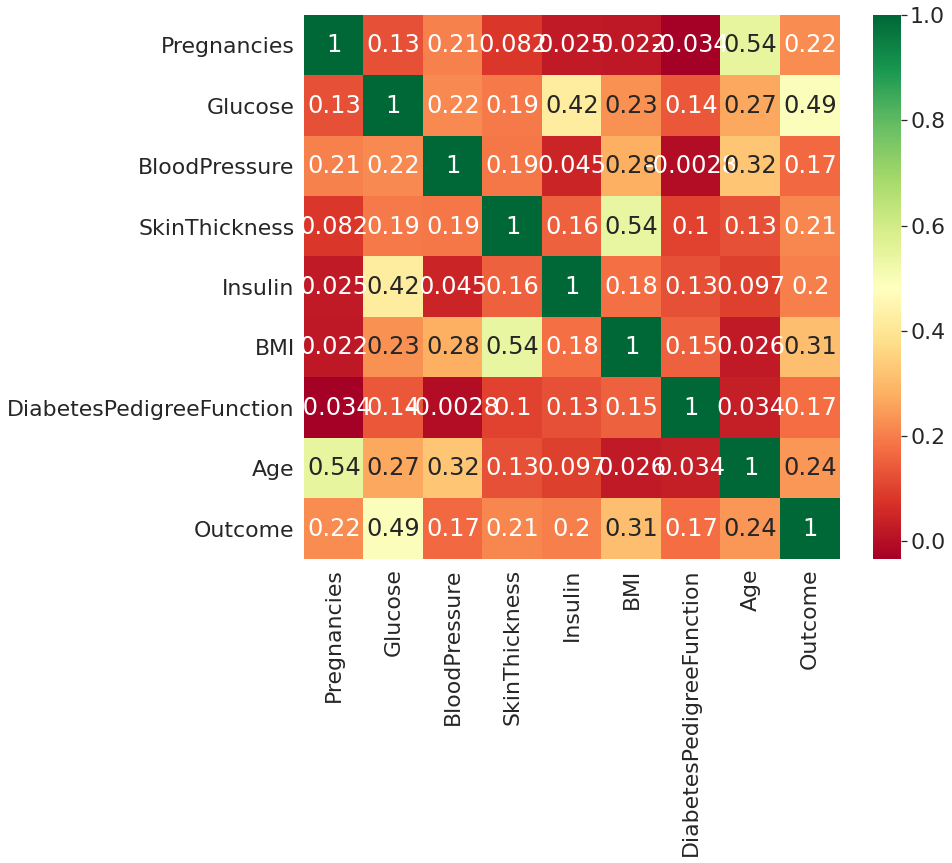

In [67]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(input_ds.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

A value > 0.7 is considered correlated column. Here we do not see such a scenario

## Project Task: Week 3

**Data Modeling :**

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

3. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to
explain what values of these parameter you have used.


### Code :

In [68]:
print("Proportion of missing values")
missing_values_count = input_ds.isna().sum()*100/input_ds.shape[0]
features_with_missing_values = missing_values_count[missing_values_count>0].index.values
missing_values_count

Proportion of missing values


Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(input_ds.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [17]:
y = input_ds.Outcome

Dividing the data between Test and Train

In [18]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

Applying KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Score that comes from testing on the same datapoints that were used for training

In [25]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


Score that comes from testing on the datapoints that were split in the beginning to be used for testing solely

In [26]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


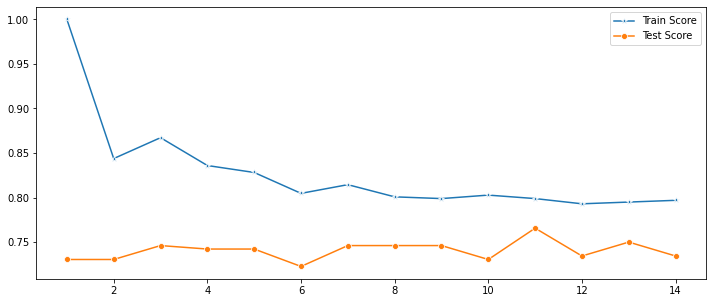

In [28]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

Now lets compare with other models

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [21]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(X_train, y_train)
y_pred_svc = classifier_rbf.predict(X_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(X_test, y_test)))

Accuracy of SVC (RBF) classifier on test set: 0.75


In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of Random Forest on test set: 0.72


In [30]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [32]:
#Prediction
y_pred_lgbm=clf.predict(X_test)
#convert into binary values
for i in range(0,99):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [33]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

In [34]:
cm

array([[140,  27],
       [ 42,  47]])

In [35]:
accuracy

0.73046875

The best result is captured at k = 11 hence 11 is used for the final model

In [53]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [54]:
model_performances = pd.DataFrame({    
    "Model" : ["Logistic Regression", "SVC", "Random Forest Regressor","Light Gradient Boosting", "KNN Classifier"],
    "Score" : [logreg.score(X_test, y_test), classifier_rbf.score(X_test, y_test),model.score(X_test, y_test), accuracy, knn.score(X_test, y_test)]
})
model_performances.round(4)

,Model,Score
0,Logistic Regression,0.7305
1,SVC,0.7500
2,Random Forest Regressor,0.7227
3,Light Gradient Boosting,0.7305
4,KNN Classifier,0.7656


We can understand from the above result set that KNN Classifier has the best accuracy

Lets use the confusion Matrix to find the Actual Cases and Predicted Cases differece

In [43]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 15.0, 'Predicted label')

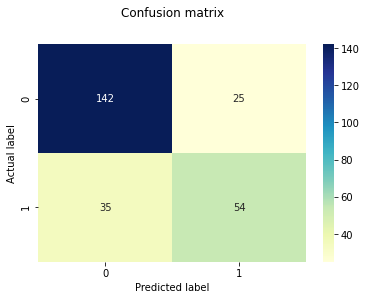

In [44]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Creating the classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



Values used for the classification are TN - 142, FP - 25, FN - 35 and TP - 54. These have been shown in the confusion matrix

Implementing the ROC Curve

In [46]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

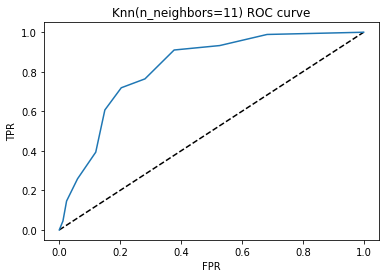

In [55]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

Area under ROC curve

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8198883132611182

In case of classifier like knn the parameter to be tuned is n_neighbors. We do that using GridSearch

Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7708853238265002
Best Parameters: {'n_neighbors': 28}


## Project Task: Week 4

**Data Modeling:**

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

**Data Reporting:**

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

   a. Pie chart to describe the diabetic or non-diabetic population

    b. Scatter charts between relevant variables to analyze the relationships
    
    c. Histogram or frequency charts to analyze the distribution of the data

    d. Heatmap of correlation analysis among the relevant variables
    
    e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 
    

### Dashboard Outputs :

See the tableau **dashboard** _**[here](https://public.tableau.com/profile/souvik.mazumdar#!/vizhome/Healthcare_Project/HealthcareStory?publish=yes)**_.

### Screenshot 1 - Diabetes Report

In [2]:
from PIL import Image as PILImage
import base64, io, IPython
def image_import(image_path):
    image = PILImage.open(image_path)
    output = io.BytesIO()
    image.save(output, format='PNG')
    encoded_string = base64.b64encode(output.getvalue()).decode()
    html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
    return IPython.display.HTML(html)


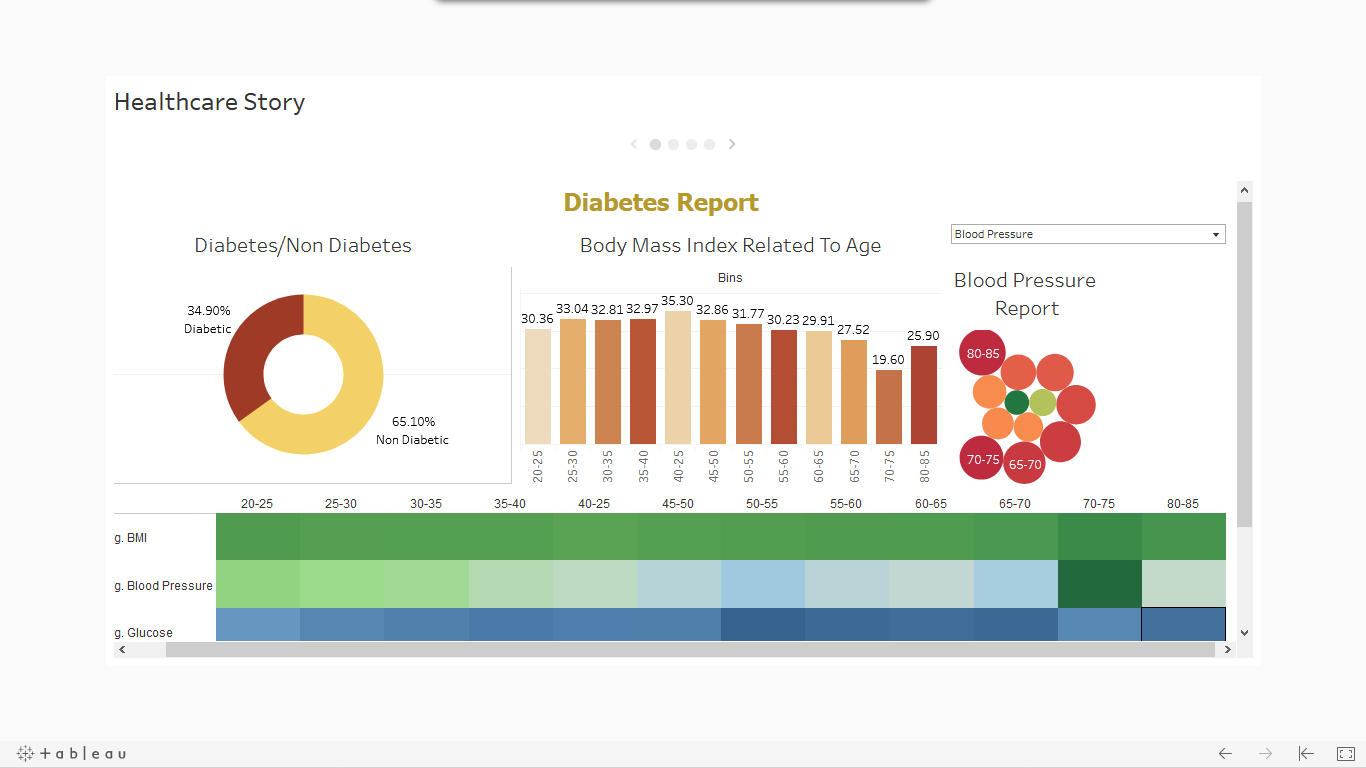

In [3]:
image_import("Healthcare.png")

### Screenshot 2 - Comparison of Diagnosis Report


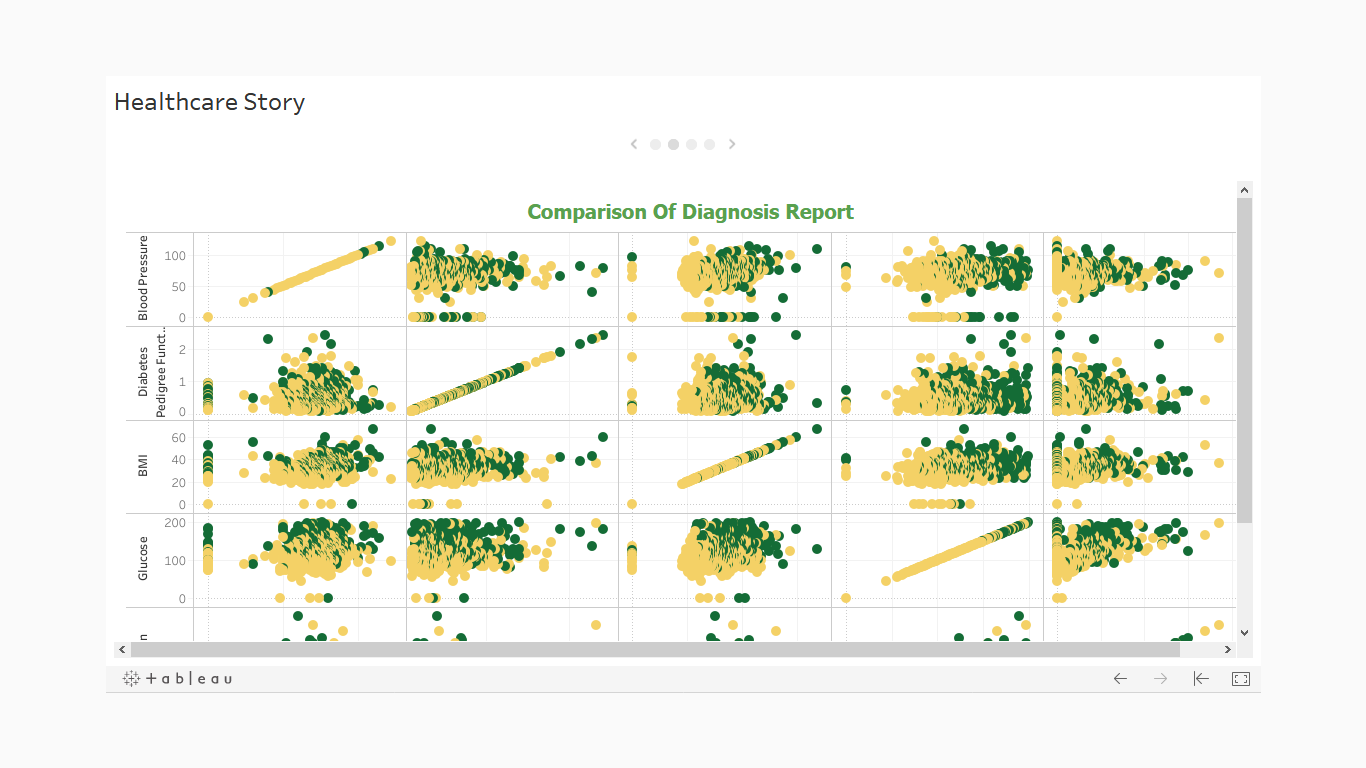

In [5]:
image_import("Healthcare_1.png")

### Screenshot 3 - Comparison of Diagnosis Report - 2


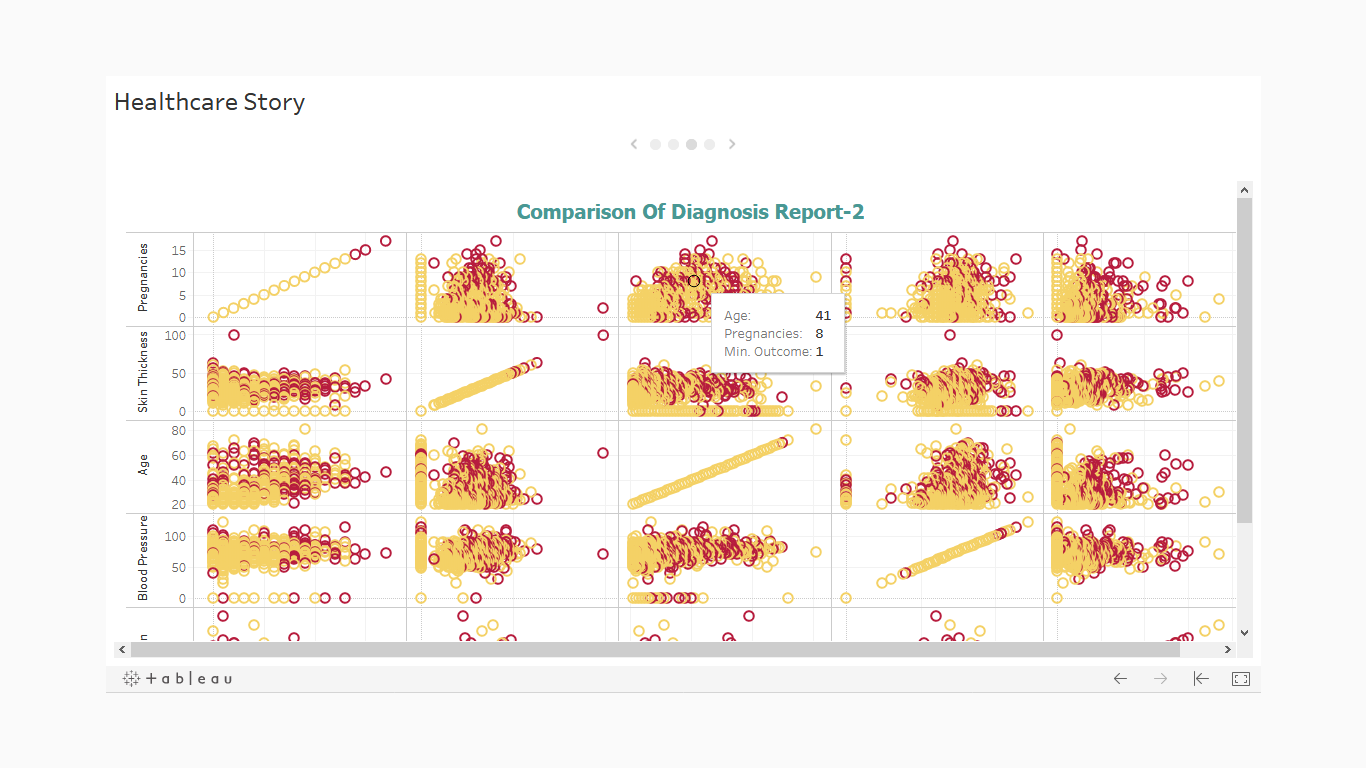

In [8]:
image_import("Healthcare_2.png")

### Screenshot 4 - Analysis of Diagnosis Report

#### Observation - 1

> The more Glucose level for a patient, the higher is the model’s prediction for the patient to be diabetic.
> In General, a patient’s chance of being diabetic increases with increase in BMI for the same levels of Glucose.

#### Observation - 2

>Glucose, Blood Pressure and insulin levels increases with age.
>Skin thickness decreases with age</li>


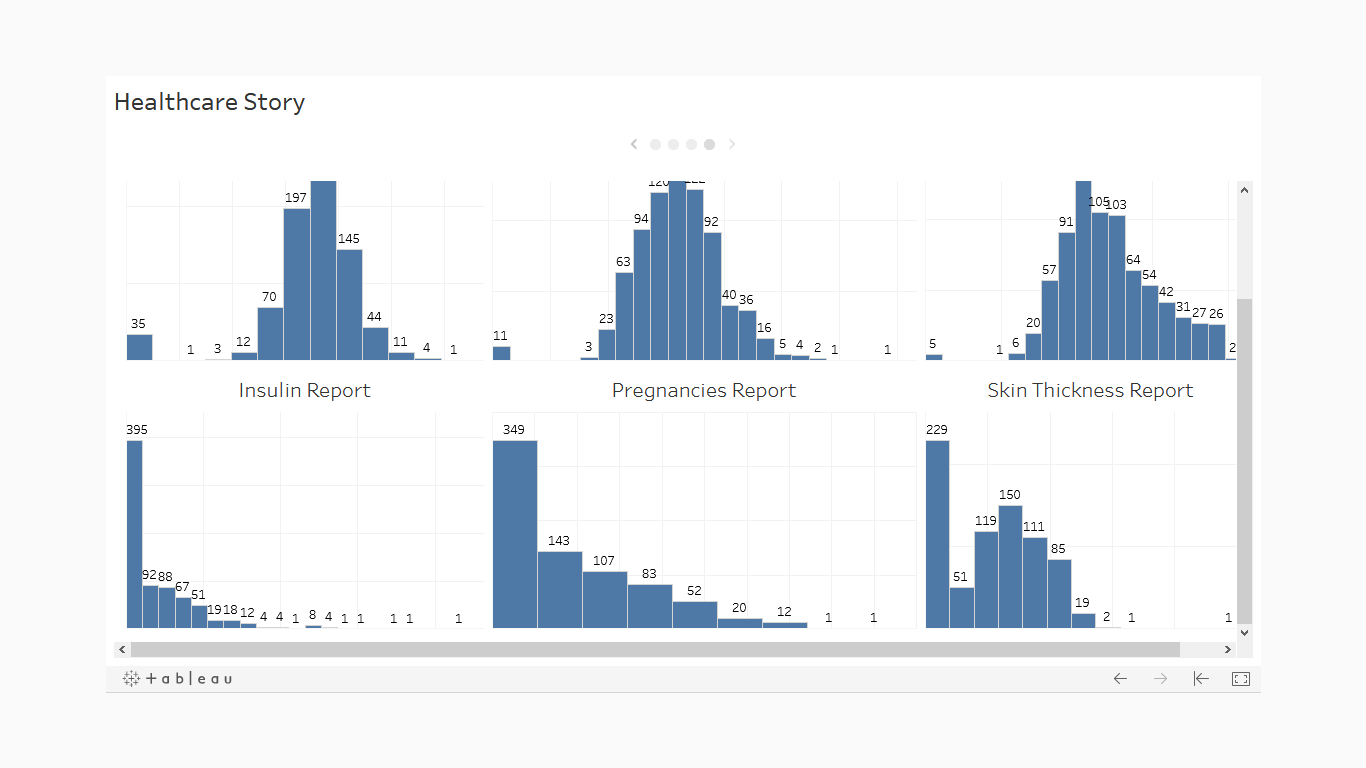

In [9]:
image_import("Healthcare_3.png")

#### Observation - 3

<li>Higher number of pregnancies, higher probability of being diabetic.</li>
    <li>People with diabetes tend to have higher BMI.</li>

---


<h2><center><b>&lt;End&gt;</b></center></h2>